## Homework Week 4

##### Import libraries, etc.

In [1]:
import os, math, json
import numpy as np
from matplotlib import pyplot as plt
import sklearn as sk
import pandas as pd
from sklearn.preprocessing import scale, StandardScaler, Normalizer
from sklearn.metrics import confusion_matrix
#from sklearn import linear_model
from sklearn import linear_model
from sklearn.model_selection import train_test_split

import random
import seaborn as sns
sns.set()

import tensorflow as tf
print("Tensorflow version " + tf.__version__)

Tensorflow version 1.14.0


In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
#pip install tensorflow

##### Set image data path and display a sample

In [4]:
#os.getcwd()
os.chdir('C:\\Users\\Steve_GA\\Siraj_Course')
#os.getcwd()


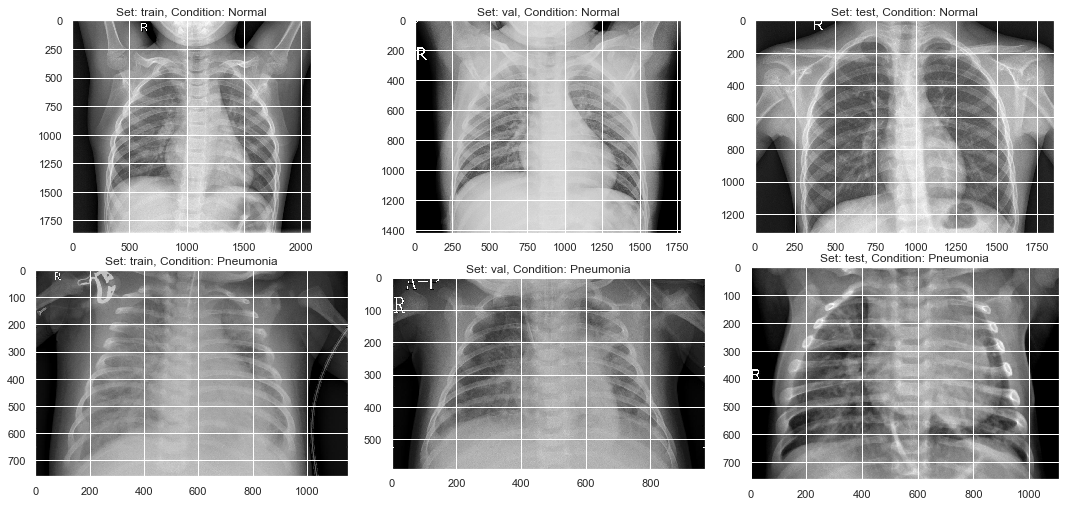

In [5]:
input_path = 'C:\\Users\\Steve_GA\\Siraj_Course\\Week4Data\\chest_xray\\'
#print(input_path)

fig, ax = plt.subplots(2, 3, figsize=(15, 7))
ax = ax.ravel()
plt.tight_layout()

for i, _set in enumerate(['train', 'val', 'test']):
    set_path = input_path+_set
    #print(set_path, i)
    # for Windows OS
    ax[i].imshow(plt.imread(set_path+'\\NORMAL\\'+os.listdir(set_path+'\\NORMAL')[0]), cmap='gray')
    # for Windows OS
    ax[i].set_title('Set: {}, Condition: Normal'.format(_set))
    ax[i+3].imshow(plt.imread(set_path+'\\PNEUMONIA\\'+os.listdir(set_path+'\\PNEUMONIA')[0]), cmap='gray')
    ax[i+3].set_title('Set: {}, Condition: Pneumonia'.format(_set))

#####  Set up the image directories

In [6]:
#training_dir = './chest_xray/train'
training_dir = 'C:\\Users\\Steve_GA\\Siraj_Course\\Week4Data\\chest_xray\\train'
validation_dir = 'C:\\Users\\Steve_GA\\Siraj_Course\\Week4Data\\chest_xray\\val'
test_dir = 'C:\\Users\\Steve_GA\\Siraj_Course\\Week4Data\\chest_xray\\test'

##### Test plotting an image 

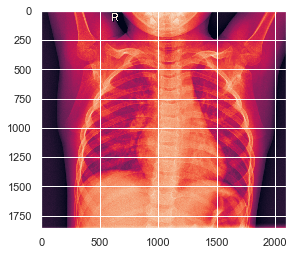

In [7]:
img = mpimg.imread(training_dir + '/NORMAL/IM-0115-0001.jpeg')
imgplot = plt.imshow(img)
plt.show()

##### Plot training data

In [8]:
def plot_images(path, labeled=False, max_images=6):
  amount = 0
  fig = plt.figure(figsize=(12, 6))

  for file in os.listdir(path):
    if file.endswith('.jpeg'):
      if amount == max_images:
        break

      img = mpimg.imread(os.path.join(path, file))
      plt.subplot(231+amount)
      if labeled:
        plt.title(file.split('_')[1])
      imgplot = plt.imshow(img)

      amount += 1

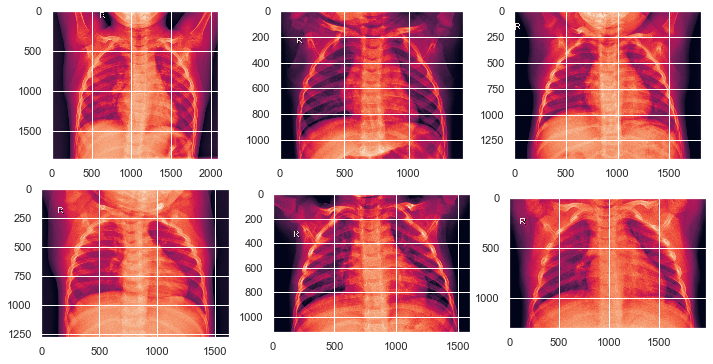

In [9]:
plot_images(training_dir + '/NORMAL')

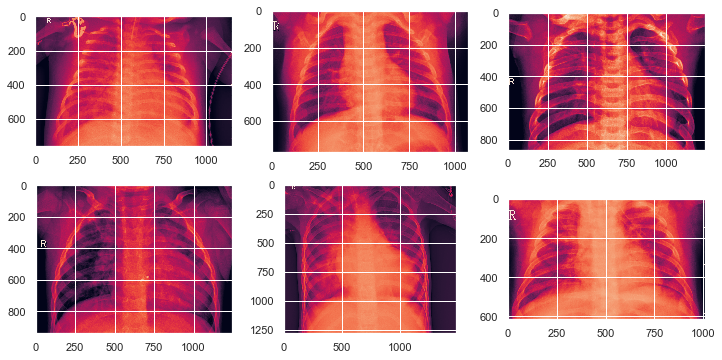

In [10]:
plot_images(training_dir + '/PNEUMONIA')

##### Use Inception_v3 model

In [11]:
import keras
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [12]:
#pip list


In [13]:
#pip install keras


##### Configure model setup

In [14]:
rescale = 1./255.0
target_size = (150, 150)
batch_size = 32
class_mode = 'categorical'

train_datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=rescale
)
train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=target_size,
    class_mode=class_mode,
    batch_size=batch_size
)

validation_datagen = ImageDataGenerator(rescale=rescale)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=target_size,
    class_mode=class_mode,
    batch_size=batch_size
)

test_datagen = ImageDataGenerator(rescale=rescale)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    class_mode=class_mode,
    batch_size=1
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


##### Define and run model

In [15]:
def get_model():
  base_model = InceptionV3(weights='imagenet', include_top=False)
  x = base_model.output
  x = keras.layers.GlobalAveragePooling2D()(x)
  x = keras.layers.Dense(1024, activation='relu')(x)
  x = keras.layers.BatchNormalization()(x)
  predictions = keras.layers.Dense(2, activation='softmax')(x)
  model = keras.models.Model(inputs=base_model.inputs, outputs=predictions)

  for layer in base_model.layers:
    layer.trainable = False
  
  model.summary()
  return model

In [16]:
model = get_model()



Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________

##### Setup and run epochs

In [17]:
model.compile(keras.optimizers.Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=6,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)


Epoch 1/6
163/163 [==============================] - 150s 920ms/step - loss: 0.3777 - accuracy: 0.8606 - val_loss: 1.7168 - val_accuracy: 0.6250
Epoch 2/6
163/163 [==============================] - 148s 907ms/step - loss: 0.2500 - accuracy: 0.9036 - val_loss: 5.0654 - val_accuracy: 0.5000
Epoch 3/6
163/163 [==============================] - 149s 913ms/step - loss: 0.2588 - accuracy: 0.8940 - val_loss: 1.4756 - val_accuracy: 0.6875
Epoch 4/6
163/163 [==============================] - 150s 919ms/step - loss: 0.2517 - accuracy: 0.9011 - val_loss: 1.4120 - val_accuracy: 0.7500
Epoch 5/6
163/163 [==============================] - 159s 976ms/step - loss: 0.2372 - accuracy: 0.9038 - val_loss: 2.1113 - val_accuracy: 0.5625
Epoch 6/6
163/163 [==============================] - 159s 973ms/step - loss: 0.2291 - accuracy: 0.9041 - val_loss: 1.3254 - val_accuracy: 0.7500


##### Plot training results

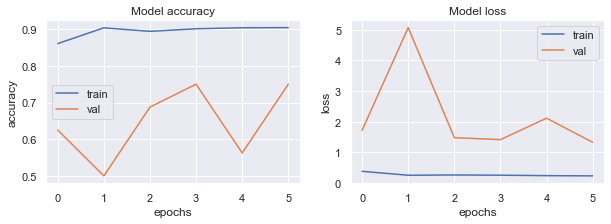

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

##### Evaluate the model

In [19]:
result  = model.evaluate_generator(test_generator, steps=len(test_generator), verbose=1)
print('Loss:', result[0])
print('Accuracy:', result[1])

624/624 [==============================] - 20s 32ms/step
Loss: 0.0
Accuracy: 0.7019230723381042


In [20]:
y_pred_batches = []
y_true_batches = []

for i in range(0, len(test_generator)):
  y_img_batch, y_true_batch = test_generator[i]
  y_true_batch = y_true_batch.argmax(axis=-1)
  #y_img_batches.append(y_img_batch)
  y_true_batches.append(y_true_batch)

  y_pred_batch = model.predict(y_img_batch)
  y_pred_batch = y_pred_batch.argmax(axis=-1)
  y_pred_batches.append(y_pred_batch)

y_pred_batches

[array([1], dtype=int64),
 array([1], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([1], dtype=int64),
 array([0], dtype=int64),
 array([1], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([0], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([0], dtype=int64),
 array([1], dtype=int64),
 array([0], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([1], 

##### Predict image class and show results

In [21]:
def predict_images(images_path, label):
  amount = 0
  fig = plt.figure(figsize=(18, 8))

  for file in os.listdir(images_path):
    if file.endswith('.jpeg'):
      if amount == 8:
        break

      img = mpimg.imread(os.path.join(images_path, file))
      plt.subplot(241+amount)
      plt.title('{} ---- {}'.format(label, 'NORMAL' if y_pred_batches[amount] == 0 else 'PNEUMONIA'))
      imgplot = plt.imshow(img)

      amount += 1

In [22]:
Y_pred = model.predict_generator(validation_generator, len(validation_generator) // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))

Confusion Matrix
[[3 5]
 [3 5]]


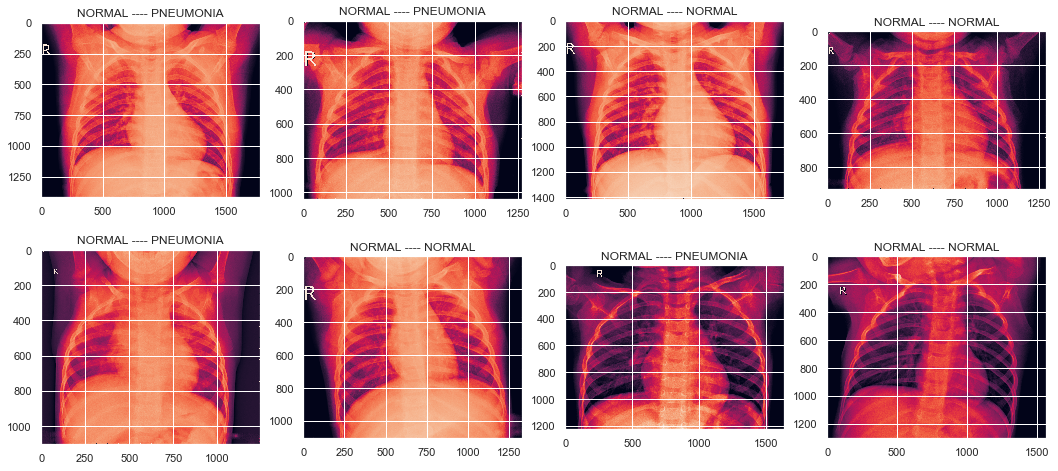

In [23]:
predict_images(validation_dir + '/NORMAL/', 'NORMAL')

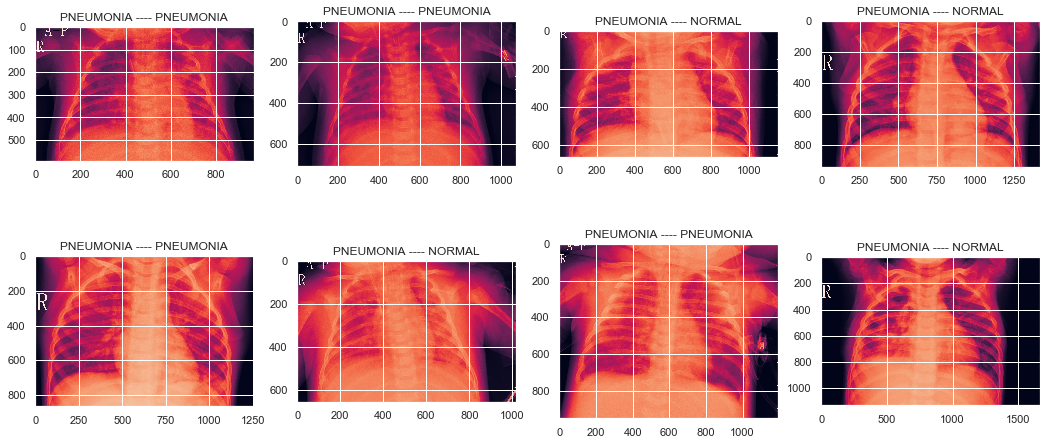

In [24]:
predict_images(validation_dir + '/PNEUMONIA/', 'PNEUMONIA')

##### Save and load model

In [26]:
model.save('first_inceptionv3_model.h5')

In [27]:
new_model = keras.models.load_model('first_inceptionv3_model.h5')